- Yahoo Finance 에서 주가 데이터 다운로드 (https://finance.yahoo.com/)
- 검색 후 Historical Data 선택
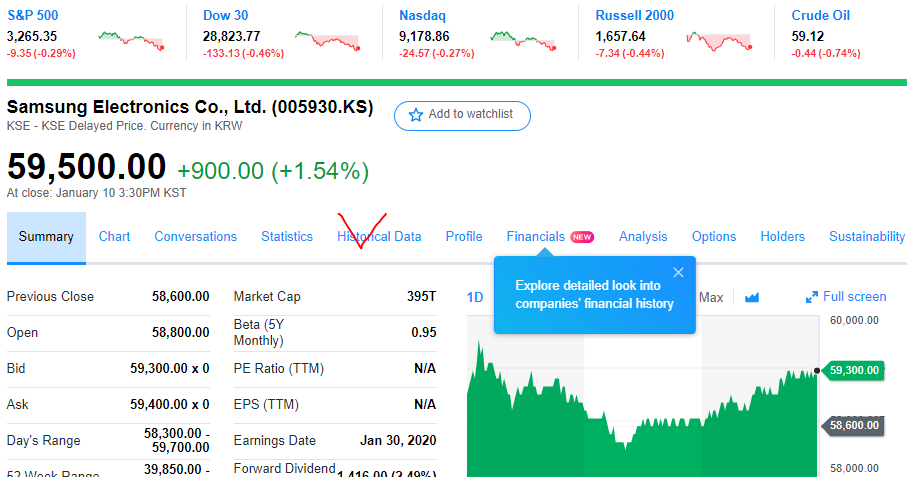

- 기간 선택 후 Download Data 클릭
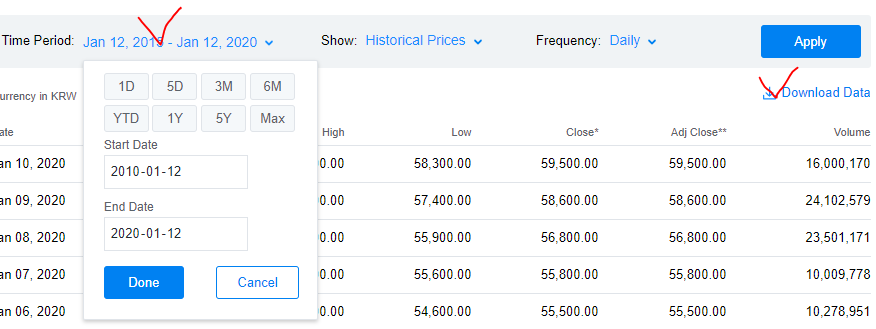

## Data Loading 및 확인

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/005930.KS.csv')
df.shape

(5361, 7)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4761.183105,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4348.184082,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4379.354004,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4317.015625,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4496.240723,46880000.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5356,2021-04-23,81900.0,82900.0,81600.0,82800.0,82800.0,17805080.0
5357,2021-04-26,82900.0,83500.0,82600.0,83500.0,83500.0,15489938.0
5358,2021-04-27,83200.0,83300.0,82500.0,82900.0,82900.0,12941533.0
5359,2021-04-28,83200.0,83200.0,82100.0,82100.0,82100.0,15596759.0
5360,2021-04-29,82400.0,82500.0,81500.0,81700.0,81700.0,18710535.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5361 non-null   object 
 1   Open       5355 non-null   float64
 2   High       5355 non-null   float64
 3   Low        5355 non-null   float64
 4   Close      5355 non-null   float64
 5   Adj Close  5355 non-null   float64
 6   Volume     5355 non-null   float64
dtypes: float64(6), object(1)
memory usage: 293.3+ KB


In [6]:
df.loc[df.Open.isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
1304,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN
4513,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN
4518,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN
4542,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
4755,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN
5000,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN


# 전처리
- date를 index
- 결측치 제거
- Adj Close 컬럼 제거
- MinMaxScaling

In [9]:
# date를 index
# date: object -> datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5361 non-null   datetime64[ns]
 1   Open       5355 non-null   float64       
 2   High       5355 non-null   float64       
 3   Low        5355 non-null   float64       
 4   Close      5355 non-null   float64       
 5   Adj Close  5355 non-null   float64       
 6   Volume     5355 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 293.3 KB


In [10]:
df.set_index('Date', inplace=True)
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4761.183105,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4348.184082,74680000.0


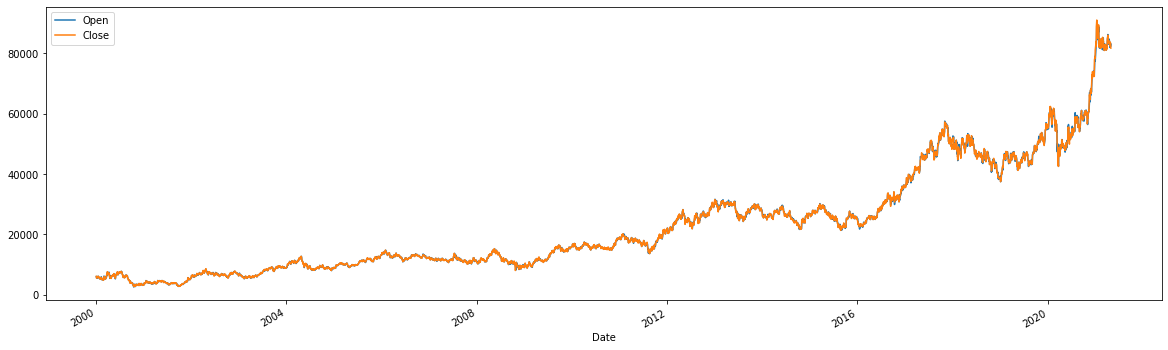

In [14]:
df[['Open', 'Close']].plot(figsize=(20, 6))

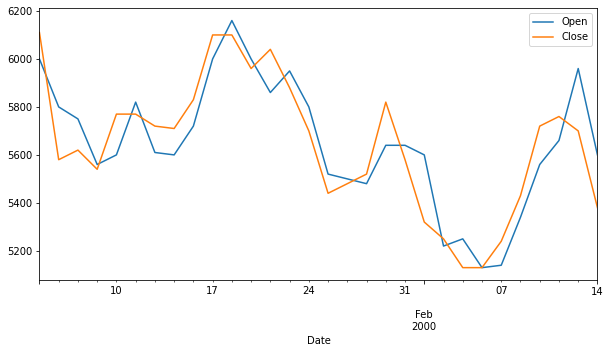

In [16]:
df[['Open', 'Close']].iloc[:30].plot(figsize=(10, 5))

In [17]:
# 결측치 처리
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5355 entries, 2000-01-04 to 2021-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5355 non-null   float64
 1   High       5355 non-null   float64
 2   Low        5355 non-null   float64
 3   Close      5355 non-null   float64
 4   Adj Close  5355 non-null   float64
 5   Volume     5355 non-null   float64
dtypes: float64(6)
memory usage: 292.9 KB


In [19]:
# Adj Close 컬럼 제거
df.drop(columns=['Adj Close'], inplace=True)

In [20]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000.0


### X, y 분리

In [21]:
df_y = df.Close.to_frame()  # df.Close: Series -> Series.to_frame(): DataFrame(2차원)
df_X = df

### Scaling - MinMaxScaler
- Scaler를 X, y 용 따로 만든다.
    - y를 inverse 하기 위해

In [27]:
df_X.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000.0


In [22]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = X_scaler.fit_transform(df_X)
y = y_scaler.fit_transform(df_y)

In [24]:
y[:3]

array([[0.03829161],
       [0.0322873 ],
       [0.03274046]])

In [25]:
y_scaler.inverse_transform(y[:3])

array([[6110.],
       [5580.],
       [5620.]])

##  날짜 종가 예측
- X: 50일치 주가, y: 51일째 주가. 
    - 50일의 연속된 주식가격으로 51일째 주가를 예측한다.
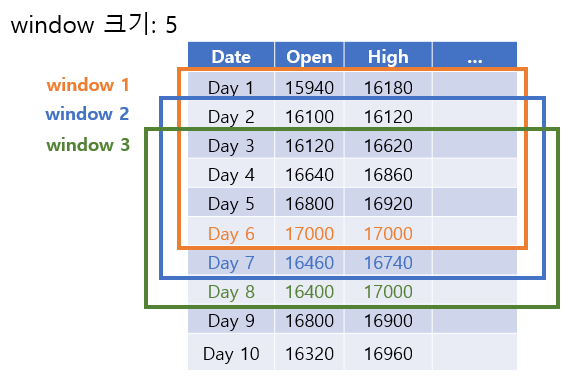     

X, y를 만든다.
각 index에 window size의 데이터셋이 들어가도록 한다.

In [28]:
window_size = 50  # 한 개 input값에 들어갈 연속된 값의 개수
data_X = []  # [[1~50], [2~51], [3~52], ...]
data_y = []  # [51, 52, 53, ...]

for i in range(0, len(y)-window_size):  # y는 결국 51부터 시작하게 되기 때문
    data_X.append(X[i: i+window_size])
    data_y.append(y[i+window_size])

In [29]:
np.shape(data_X)

(5305, 50, 5)

In [30]:
np.shape(data_y)

(5305, 1)

## Train, Test 분리

In [32]:
# Train : Test = 8 : 2
train_index = int(len(data_y)*0.8)
print(train_index)

4244


In [34]:
X_train, y_train = np.array(data_X[0: train_index]), np.array(data_y[0:train_index])
X_test, y_test = np.array(data_X[train_index:]), np.array(data_y[train_index:])

In [35]:
X_train.shape, X_test.shape

((4244, 50, 5), (1061, 50, 5))

In [83]:
y_train.shape, y_test.shape

((4244, 1), (1061, 1))

## Model 생성
- LSTM 레이어는 return_sequences 인자에 따라 마지막 시퀀스에서 한 번만 출력할 수 있고 각 시퀀스에서 출력을 할 수 있다. 
    - return_sequences=True: 시퀀스마다 결과를 출력. False(기본값): 전체 Sequence를 처리하고 결과를 하나만 출력
- many to many 문제를 풀거나 LSTM 레이어를 여러개로 쌓아올릴 때는 return_sequence=True 옵션을 사용. 
- Dense에는 False로 해서 하나만 전달.
- 아래 그림에서 왼쪽은 return_sequences=False일 때, 오른쪽은 return_sequence=True일 때의 형상.

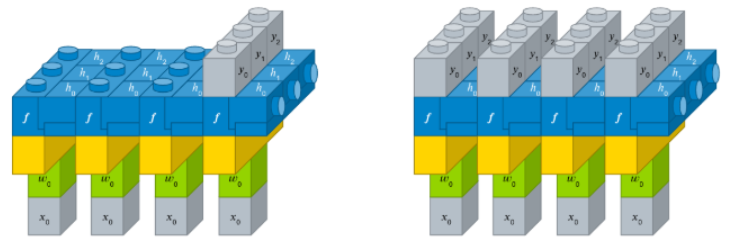

<center>[출처: https://tykimos.github.io/2017/04/09/RNN_Getting_Started]</center>

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
# 하이퍼파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 100
N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]

In [38]:
# Dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [39]:
X_train.shape

(4244, 50, 5)

In [42]:
# 모델
def create_model():
    model = keras.Sequential()
    model.add(layers.Input((window_size, 5)))  # window_size = 50이므로
    # LSTM
    model.add(layers.LSTM(32, activation='relu', return_sequences=False))  
    # return_sequences: LSTM의 블럭마다 값을 출력하는 것(True) -> many-to-many의 관계에서 필요
    # LSTM 모델을 여러겹 쌓을떄도 아래층의 LSTM에는 return_sequences = True로 줘야 한다.(위 그림 설명 참고)
    model.add(layers.Dense(32, activation='relu'))
    # Output
    model.add(layers.Dense(1))  # 회귀(Regression)이므로 activation함수는 사용하지 않았다.
    
    return model

In [44]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='mse'
             )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                4864      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


In [46]:
steps_per_epoch = N_TRAIN//N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

hist = model.fit(train_dataset,
                 epochs=N_EPOCHS,
                 steps_per_epoch=steps_per_epoch,
                 validation_data=test_dataset,
                 validation_steps=validation_steps,
                 )

Train for 42 steps, validate for 11 steps
Epoch 1/100
42/42 [==============================] - 1s 17ms/step - loss: 3.6857e-05 - val_loss: 0.0064
Epoch 2/100
42/42 [==============================] - 1s 16ms/step - loss: 3.4591e-05 - val_loss: 0.0057
Epoch 3/100
42/42 [==============================] - 1s 16ms/step - loss: 3.4640e-05 - val_loss: 0.0045
Epoch 4/100
42/42 [==============================] - 1s 15ms/step - loss: 3.2473e-05 - val_loss: 0.0045
Epoch 5/100
42/42 [==============================] - 1s 15ms/step - loss: 3.1963e-05 - val_loss: 0.0037
Epoch 6/100
42/42 [==============================] - 1s 17ms/step - loss: 3.1718e-05 - val_loss: 0.0034
Epoch 7/100
42/42 [==============================] - 1s 17ms/step - loss: 3.1211e-05 - val_loss: 0.0031
Epoch 8/100
42/42 [==============================] - 1s 18ms/step - loss: 3.1344e-05 - val_loss: 0.0027
Epoch 9/100
42/42 [==============================] - 1s 16ms/step - loss: 3.0399e-05 - val_loss: 0.0025
Epoch 10/100
42/42 [==

## 모델 학습, 평가

In [47]:
# 평가
loss = model.evaluate(test_dataset)

11/11 [==============================] - 0s 8ms/step - loss: 1.8748e-04


In [49]:
y_scaler.inverse_transform(np.array(loss).reshape(-1, 1))

array([[2746.54881266]])

## 예측

In [52]:
pred = model.predict(X_test)
pred_price = y_scaler.inverse_transform(pred)

In [53]:
pred_price[-3:]

array([[84240.72 ],
       [83919.195],
       [83415.28 ]], dtype=float32)

In [57]:
y_price = y_scaler.inverse_transform(y_test)

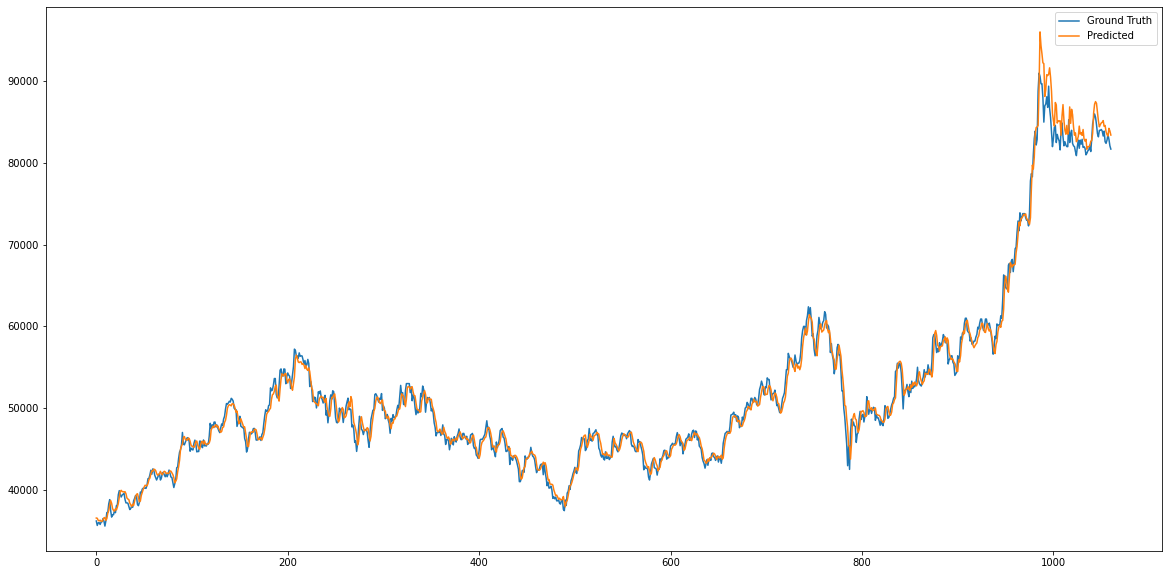

In [60]:
# 실제값, 예측값을 그래프로 비교
plt.figure(figsize=(20, 10))

plt.plot(y_price, label='Ground Truth')
plt.plot(pred_price, label='Predicted')

plt.legend()
plt.show()

In [121]:
# 내일의 주가 (4/30-삼성전자 종가 체크 -> 결과 가격에서 -1700 ~ -1800원 정도 해줘야 함.)
tomorrow = np.array(X[-50:])
tomorrow.shape

(50, 5)

In [122]:
tomorrow = tomorrow[np.newaxis, ...]
tomorrow.shape

(1, 50, 5)

In [123]:
pred_tomorrow = model.predict(tomorrow)
pred_tomorrow

array([[0.9068474]], dtype=float32)

In [124]:
pred_price = y_scaler.inverse_transform(pred_tomorrow)
pred_price

array([[82777.42]], dtype=float32)